In [1]:
#Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
## Reading train data
df_train=pd.read_csv('Lineardata_train.csv')
arr_train=df_train.to_numpy()
print(f"data_train.shape: {arr_train.shape}")
df_train.describe()

data_train.shape: (50000, 21)


,target,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,60.363789,-0.001251,0.005908,-0.021647,0.000224,-0.009888,-0.013699,-0.010715,0.011966,0.025163,...,0.039452,0.029616,0.040044,-0.026093,0.086143,0.189269,-0.186785,-0.037656,0.318898,-0.005003
std,11447.747664,1.000905,3.013633,4.977639,2.017882,3.987972,5.998339,11.042788,20.058350,18.948427,...,11.020757,8.031008,25.025312,16.017437,49.949831,234.435998,21.932714,15.076191,35.964589,23.043013
min,-47849.545558,-4.461474,-11.965091,-20.048499,-10.318884,-15.253710,-25.933390,-52.640971,-82.292012,-83.157010,...,-43.608096,-32.817900,-103.722239,-62.092891,-197.072660,-1031.075360,-100.173033,-70.630125,-145.322736,-106.109451
25%,-7616.900424,-0.676508,-2.019477,-3.395864,-1.364116,-2.702314,-4.083990,-7.440581,-13.544104,-12.845738,...,-7.429392,-5.341417,-16.833932,-10.805992,-33.642367,-158.728445,-15.044545,-10.218364,-24.057880,-15.637308
50%,23.831852,-0.003742,0.002262,-0.043254,0.003599,-0.031625,-0.028813,-0.021592,-0.075814,-0.000539,...,-0.028604,0.011208,0.144755,-0.074922,0.138856,-0.750988,-0.209511,-0.037494,0.324643,0.037622
75%,7812.637690,0.674528,2.007751,3.350244,1.358989,2.664738,4.058076,7.448165,13.574391,12.788279,...,7.509581,5.460852,17.171388,10.865153,33.656070,158.780248,14.507303,10.238408,24.666228,15.432530
max,47663.428386,4.339986,12.747987,22.356430,8.755168,17.141740,27.897555,43.515999,78.759330,93.144990,...,52.817197,29.121791,97.899039,67.965257,212.527224,993.694944,95.530691,61.667628,142.052561,89.728527


In [3]:
## Reading test data
df_test=pd.read_csv('Lineardata_test.csv')
arr_test=df_test.to_numpy()
print(f"data_train.shape: {arr_test.shape}")
df_test.describe()

data_train.shape: (10000, 21)


,ID,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14980.914600,0.010114,-0.037099,-0.144645,-0.029150,-0.028261,0.053683,-0.036813,0.027057,0.495906,...,-0.030035,-0.016858,0.335824,-0.029764,0.008316,-0.894627,0.006057,-0.121053,0.133633,0.166874
std,2891.511115,0.994547,2.979410,5.004012,1.993720,3.987958,6.095746,11.124489,19.580361,18.924274,...,11.052169,8.048555,25.117684,16.132911,49.779241,233.490880,21.825701,15.163322,35.895958,22.845367
min,10001.000000,-3.897753,-11.665126,-17.564360,-6.939906,-15.164897,-25.182110,-38.775573,-71.995052,-80.965448,...,-42.378374,-38.090445,-97.698226,-68.592099,-196.641337,-871.152991,-99.412927,-53.862112,-138.549286,-82.621060
25%,12421.750000,-0.658942,-2.044513,-3.540605,-1.368266,-2.716685,-4.054070,-7.523581,-13.104135,-12.092727,...,-7.476039,-5.402310,-16.748320,-10.570348,-34.301825,-157.900602,-14.463851,-10.239734,-24.644848,-15.721225
50%,14968.500000,0.006322,-0.025006,-0.132415,-0.050723,-0.025543,0.015491,-0.164465,-0.092684,0.491083,...,-0.160099,-0.004958,0.439045,-0.064796,-0.339051,-0.991308,-0.140713,-0.022962,0.260213,0.172948
75%,17477.250000,0.678826,1.959255,3.246341,1.316789,2.641718,4.100477,7.559988,13.204962,13.269433,...,7.580487,5.389689,17.216558,10.778228,33.601224,157.494155,14.726151,10.258995,24.857786,15.722924
max,19999.000000,3.676684,11.011697,20.730502,7.632936,14.548501,22.115958,46.061417,77.148731,76.038898,...,45.448567,31.550800,92.413115,65.835285,172.431490,822.093741,79.694581,59.492023,125.409116,85.098549


In [4]:
## Forming Input and Output labels of training set
x_train=arr_train[:,1:]
print(x_train.shape)
print(x_train)

y_train=arr_train[:,0]
print(y_train.shape)
print(y_train)

(50000, 20)
[[-9.00469588e-01  8.50978218e-01 -2.06952632e+00 ... -9.68452346e+00
   1.82118994e+01 -1.68484235e+01]
 [-2.66567434e-01  2.86549584e+00 -6.39677992e+00 ...  6.52914102e+00
  -4.57727939e+00  2.80805295e+01]
 [-5.89188588e-02  6.35366255e-01 -3.56321592e+00 ... -6.45143845e+00
  -1.70804082e+01 -1.35009528e+01]
 ...
 [-3.21084933e-01  1.60838573e+00 -1.11770995e+01 ... -4.29975339e+00
   1.60530318e+01  1.48127151e+01]
 [-2.38343160e+00  1.21491121e+00  9.25112877e-01 ... -5.08280126e+00
   7.51408869e+00  3.01504845e+01]
 [ 1.39653447e+00  1.04498367e+00  6.97468560e+00 ... -2.13494556e+00
   9.04293672e+01 -3.64122320e+01]]
(50000,)
[ -5928.10274562   -738.89085527 -20186.84158668 ...  -8246.69722146
  -9101.10137698   3420.72986003]


In [5]:
## Forming Input and Output labels of test set
x_test=arr_test[:,1:]
print(x_test.shape)
print(x_test)

y_test=arr_test[:,0]
print(y_test.shape)
print(y_test)

(10000, 20)
[[  0.63425968  -0.77172682   4.29769361 ...  21.38312261 -37.84185715
   18.89238477]
 [  0.45612837   3.15443342   0.18200559 ...  -1.20727899 -28.15418484
   -3.60374419]
 [  0.39081459  -5.2782841    1.62594277 ...   7.46680301  49.90465914
   46.99006168]
 ...
 [ -0.34993236   4.61195534  -2.81473526 ...  11.29402377   1.44193814
    4.39548236]
 [  0.29583261   1.82555163  -8.82473085 ... -16.09934402  10.74475735
    6.57869536]
 [ -0.55583739  -0.11103869  -0.47740673 ...  -9.31502593 -10.49082963
   13.28854002]]
(10000,)
[14189. 14742. 13905. ... 15552. 12161. 14055.]


In [6]:
## Z-score Normalisatio of data
def feature_scale_zNormal(x):
    mean=np.mean(x,axis=0)
    std=np.std(x,axis=0)
    x_normal=(x-mean)/std
    return x_normal
x_train= feature_scale_zNormal(x_train)   

In [7]:
# calculating the cost function
def cost_function(x,y,w,b):
    m=x.shape[0]  #number of traing examples(rows)
    y_predicted=(np.matmul(w,x.T)).T+b
    cost=np.sum((y_predicted-y)**2)/(2*m)
    return cost

In [8]:
## Checking cost for a specific case
w_in=np.zeros(20)
b_in=0
z=cost_function(x_train,y_train,w_in,b_in)
print(z)

65525974.67893045


In [9]:
# calculating value of the gradient
def gradient(x,y,w,b):
    m=x.shape[0]  #number of traing examples(rows)
    n=x.shape[1]  #number of columns(features)
    dJ_dw=np.zeros(n)
    dJ_db=np.zeros(1)
    y_predicted=(np.matmul(w,x.T)).T+b
    dJ_dw=np.matmul((y_predicted-y),x)
    dJ_db=np.sum(y_predicted-y)
    dJ_dw/=m
    dJ_db/=m
    return dJ_dw,dJ_db

In [10]:
## Checking gradient for a specific case
w_in=np.zeros(20)
b_in=0
z=gradient(x_train,y_train,w_in,b_in)
print(z)

(array([    43.1316177 ,    -30.29964891,     16.35279971,    -24.44068197,
         -219.91808623,   -365.09826951,   -262.71858416,   -857.3590147 ,
         -477.8212403 ,    -73.87167843,    -47.32163805,  -1544.70009716,
        -1695.9861687 ,  -1328.5843068 ,   -606.97429282, -10557.75219677,
         -483.14675727,   -727.4699656 ,  -3229.27262694,   -253.36070409]), -60.36378861657938)


In [11]:
# gradient decent calculation for w and b
def gradient_decent(x,y,w,b,alpha,iterations_n):
    w_new=w
    b_new=b
    for i in range(iterations_n):
        dj_dw,dj_db=gradient(x,y,w_new,b_new)
        w_new=w_new-(alpha)*dj_dw
        b_new= b_new-(alpha)*dj_db
       
    return w_new,b_new

In [12]:
# variation in cost with iterations
m=0
cost=0.0
def costplot(x,y,w,b,alpha,iterations_n):
    w_new=w
    b_new=b
    iterations_new=iterations_n
    n=math.floor(iterations_n/10)
    cost=np.zeros(n)
    m=np.arange(n)
    for i in range(n):
        cost[i]=cost_function(x,y,w_new,b_new)
        w_new,b_new=gradient_decent(x,y,w_new,b_new,alpha,iterations_n)
    print(cost[n-1])
    plt.title('COST VS NO.OF ITERATIONS')
    plt.ylabel('COST')
    plt.xlabel('NO.OF ITERATIONS')
    plt.plot(m,cost)
    return w_new,b_new

In [13]:
# measuring accuracy
def R2score(y_predicted,y_actual):
    y_actual_mean=np.mean(y_actual)
    a1=np.sum((y_predicted-y_actual)**2)
    a2=np.sum((y_actual-y_actual_mean)**2)
    accuracy=(1-a1/a2)*100
    return accuracy

0.005050994574172633


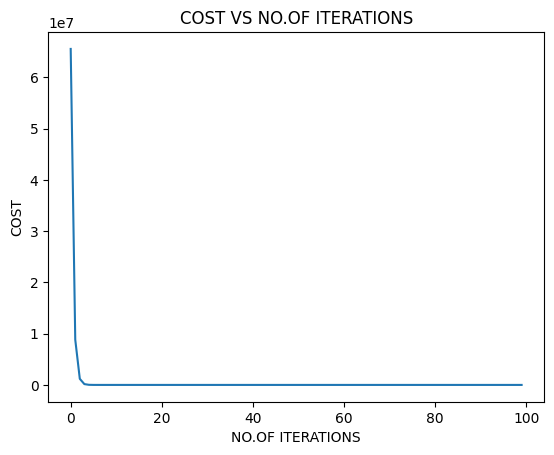

In [14]:
w_int=np.zeros(20)
b_int=0
x_train_normal=feature_scale_zNormal(x_train)
w_new1,b_new1=costplot(x_train_normal,y_train,w_int,b_int,0.001,1000)

0.0050478845815012325


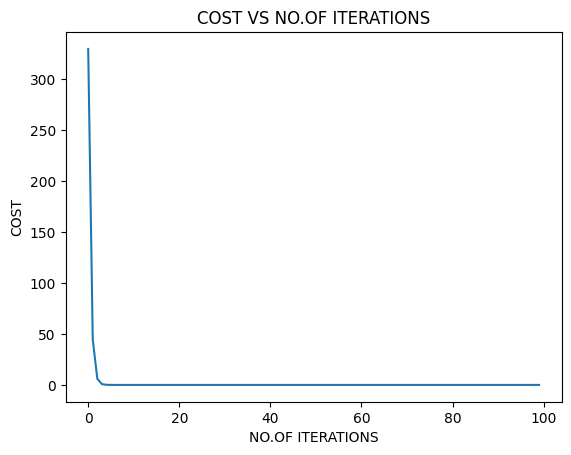

In [15]:
x=x_train[1:40000,:]
y=y_train[1:40000]
x_cv=x_train[40000:50000,:]
y_cv=y_train[40000:50000]
x=feature_scale_zNormal(x)
w=np.zeros(0)
b=0
w_cv,b_cv=costplot(x,y,w_new1,b_new1,0.001,1000)

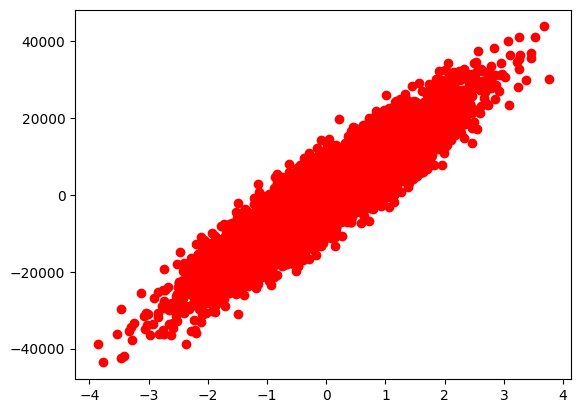

In [21]:
y_predcv=(np.matmul(w_cv,x_cv.T)).T+b_cv
plt.scatter(x_cv[:,15],y_cv,color='red')

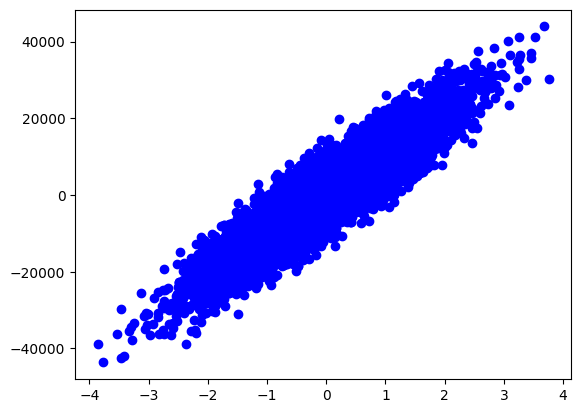

In [22]:
plt.scatter(x_cv[:,15],y_predcv,color='blue')

In [23]:
print(R2score(y_predcv,y_cv))

99.99949809858576


In [26]:
x_test = feature_scale_zNormal(x_test)
y_prediction = np.matmul(w_cv, x_test.T).T + b_cv

csv_file_path = 'Linear_Predicted.csv'
np.savetxt(csv_file_path, y_prediction, delimiter=',')
print(f"Array has been saved to {csv_file_path}")

Array has been saved to Linear_Predicted.csv
